In [6]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("../")
import math
from glob import glob

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import pykep as pk
import seaborn as sns
sns.set_theme()
sns.set(font_scale = 1.5)
from mpl_toolkits import mplot3d
#%matplotlib notebook

dt = 10 #timestep of the inspected simulations, affects time labels in plots
starting_t = pk.epoch_from_string('2022-01-01 00:00:00.000') # starting t of the simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
all_files = [h5py.File("../results/hdf5Output/simulationData.h5_rank_"+str(i)) for i in range(64)]

In [8]:
# Load hdf5 file
data = h5py.File("../results/hdf5Output/simulationData.h5_rank_0")

# Determine the iterations at which output was written
iterations_idx_str = list(data["ParticleData"].keys())
iterations_idx = []
for it in iterations_idx_str:
    if it != "ConstantProperties":
        iterations_idx.append(int(it))
iterations_idx.sort()
max_iterations = max(iterations_idx)
print("Found a total of", max_iterations, " iterations.")

# Find out the simulation runtime in days
end_t = pk.epoch(starting_t.mjd2000 + max_iterations * dt * pk.SEC2DAY)
total_days = end_t.mjd - starting_t.mjd
print("Simulation ran for a total of", total_days, " days.")

Found a total of 799  iterations.
Simulation ran for a total of 0.0924768518525525  days.


In [10]:
len(iterations_idx)

800

In [12]:
particles = {}
for rank_idx,rank in tqdm(enumerate(all_files)):
    for idx in iterations_idx:
        ids = np.array(rank["ParticleData"][str(idx)]["Particles"]["IDs"])
        for id in ids:
            if id not in particles.keys():
                particles[id] = np.zeros(len(iterations_idx))
            particles[id][idx] = rank_idx

64it [10:49, 10.15s/it]


In [15]:
rank_load = np.zeros((64,800))
for rank_idx,rank in tqdm(enumerate(all_files)):
    for idx in iterations_idx:
         rank_load[rank_idx,idx] = len(np.array(rank["ParticleData"][str(idx)]["Particles"]["IDs"]))

64it [00:53,  1.21it/s]


In [18]:
visited_ranks = []
for particle in particles.values():
    visited_ranks.append(len(np.unique(particle))) 

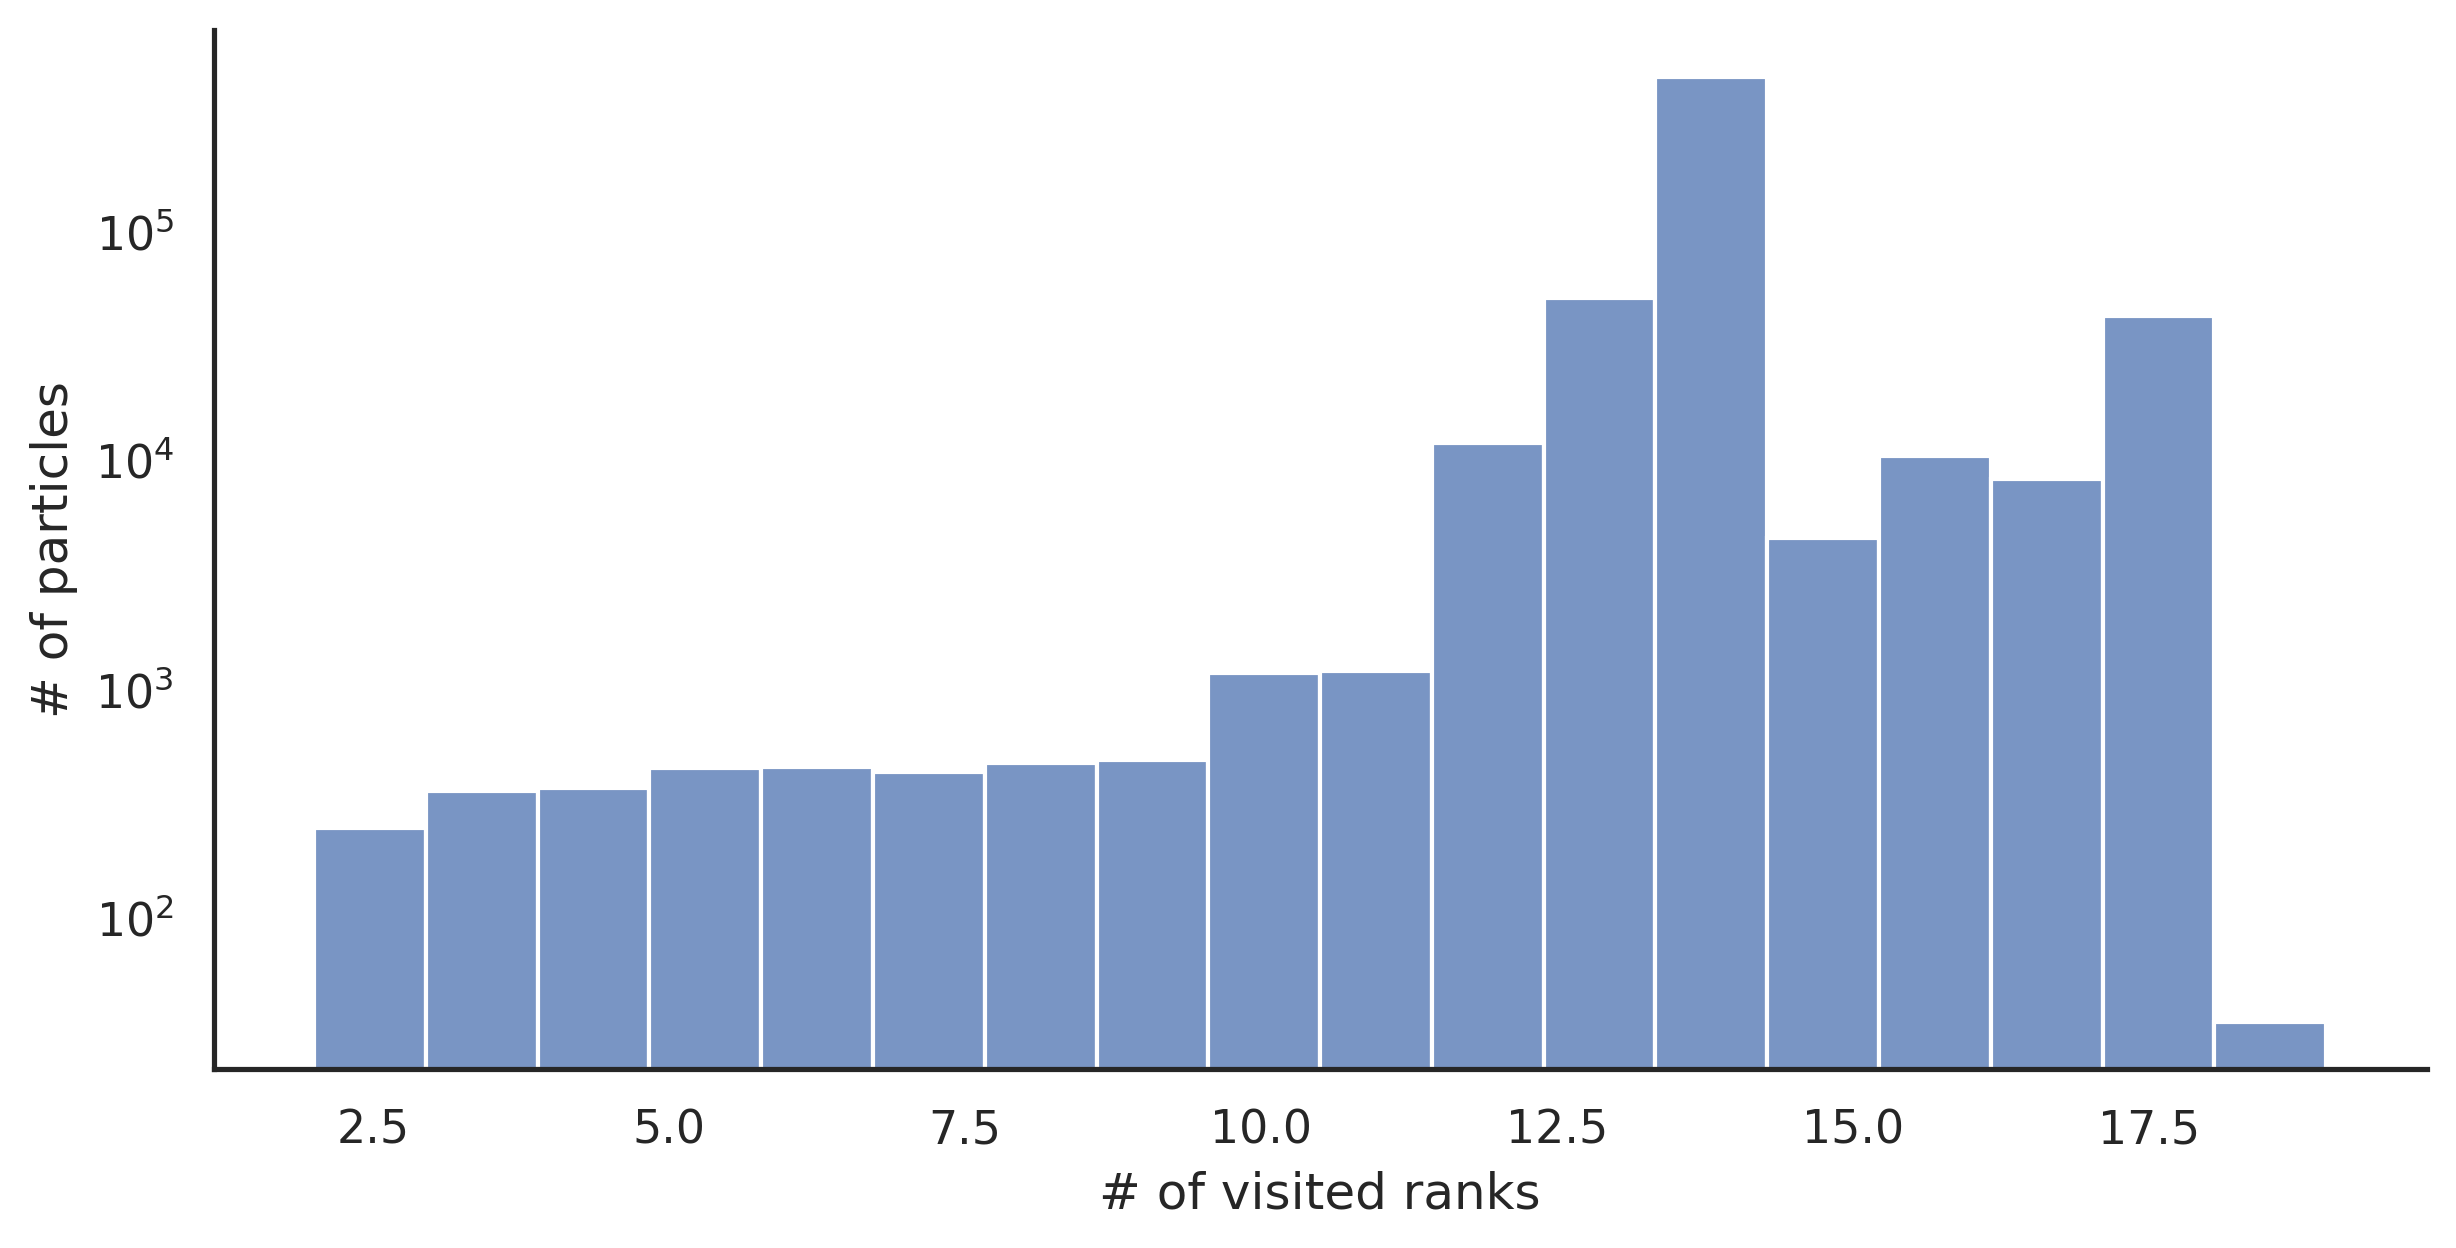

In [65]:
sns.set_style("white")
p = sns.displot(visited_ranks, kind="hist",multiple="stack",log_scale=(False,False),bins=len(np.unique(visited_ranks)))
plt.xlabel("# of visited ranks")
plt.ylabel("# of particles")
plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()

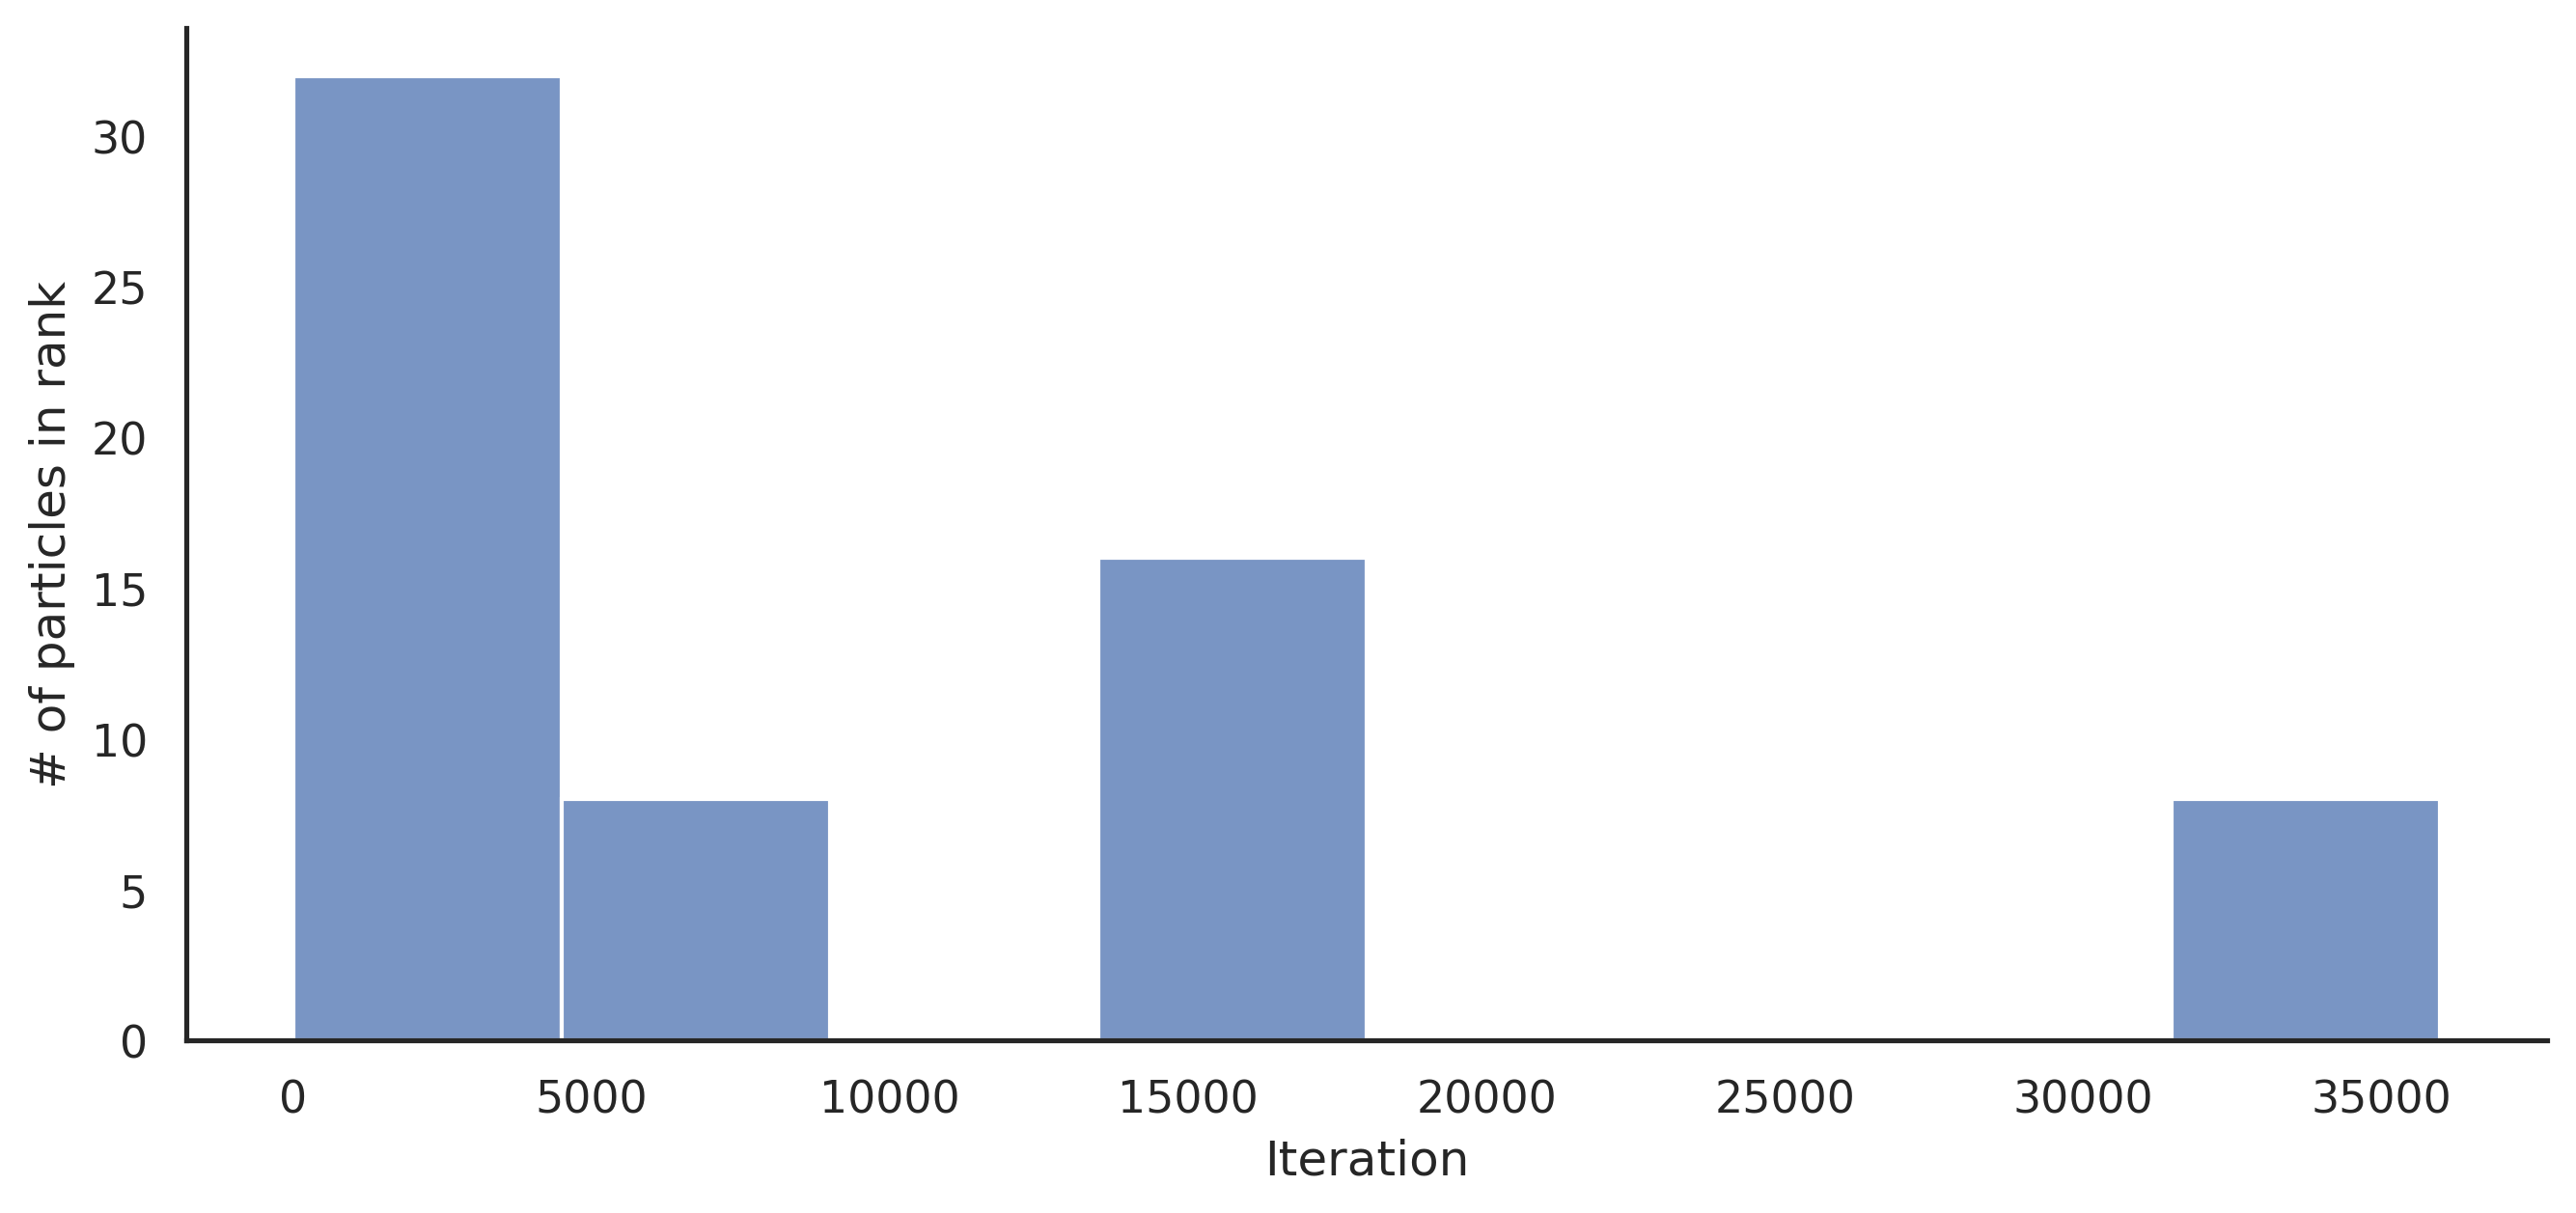

In [79]:
data = np.transpose(rank_load)
sns.set_style("white")
p = sns.displot(rank_load[:,0], kind="hist",multiple="stack",log_scale=(False,False))
plt.xlabel("Iteration")
plt.ylabel("# of particles in rank")
# plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()


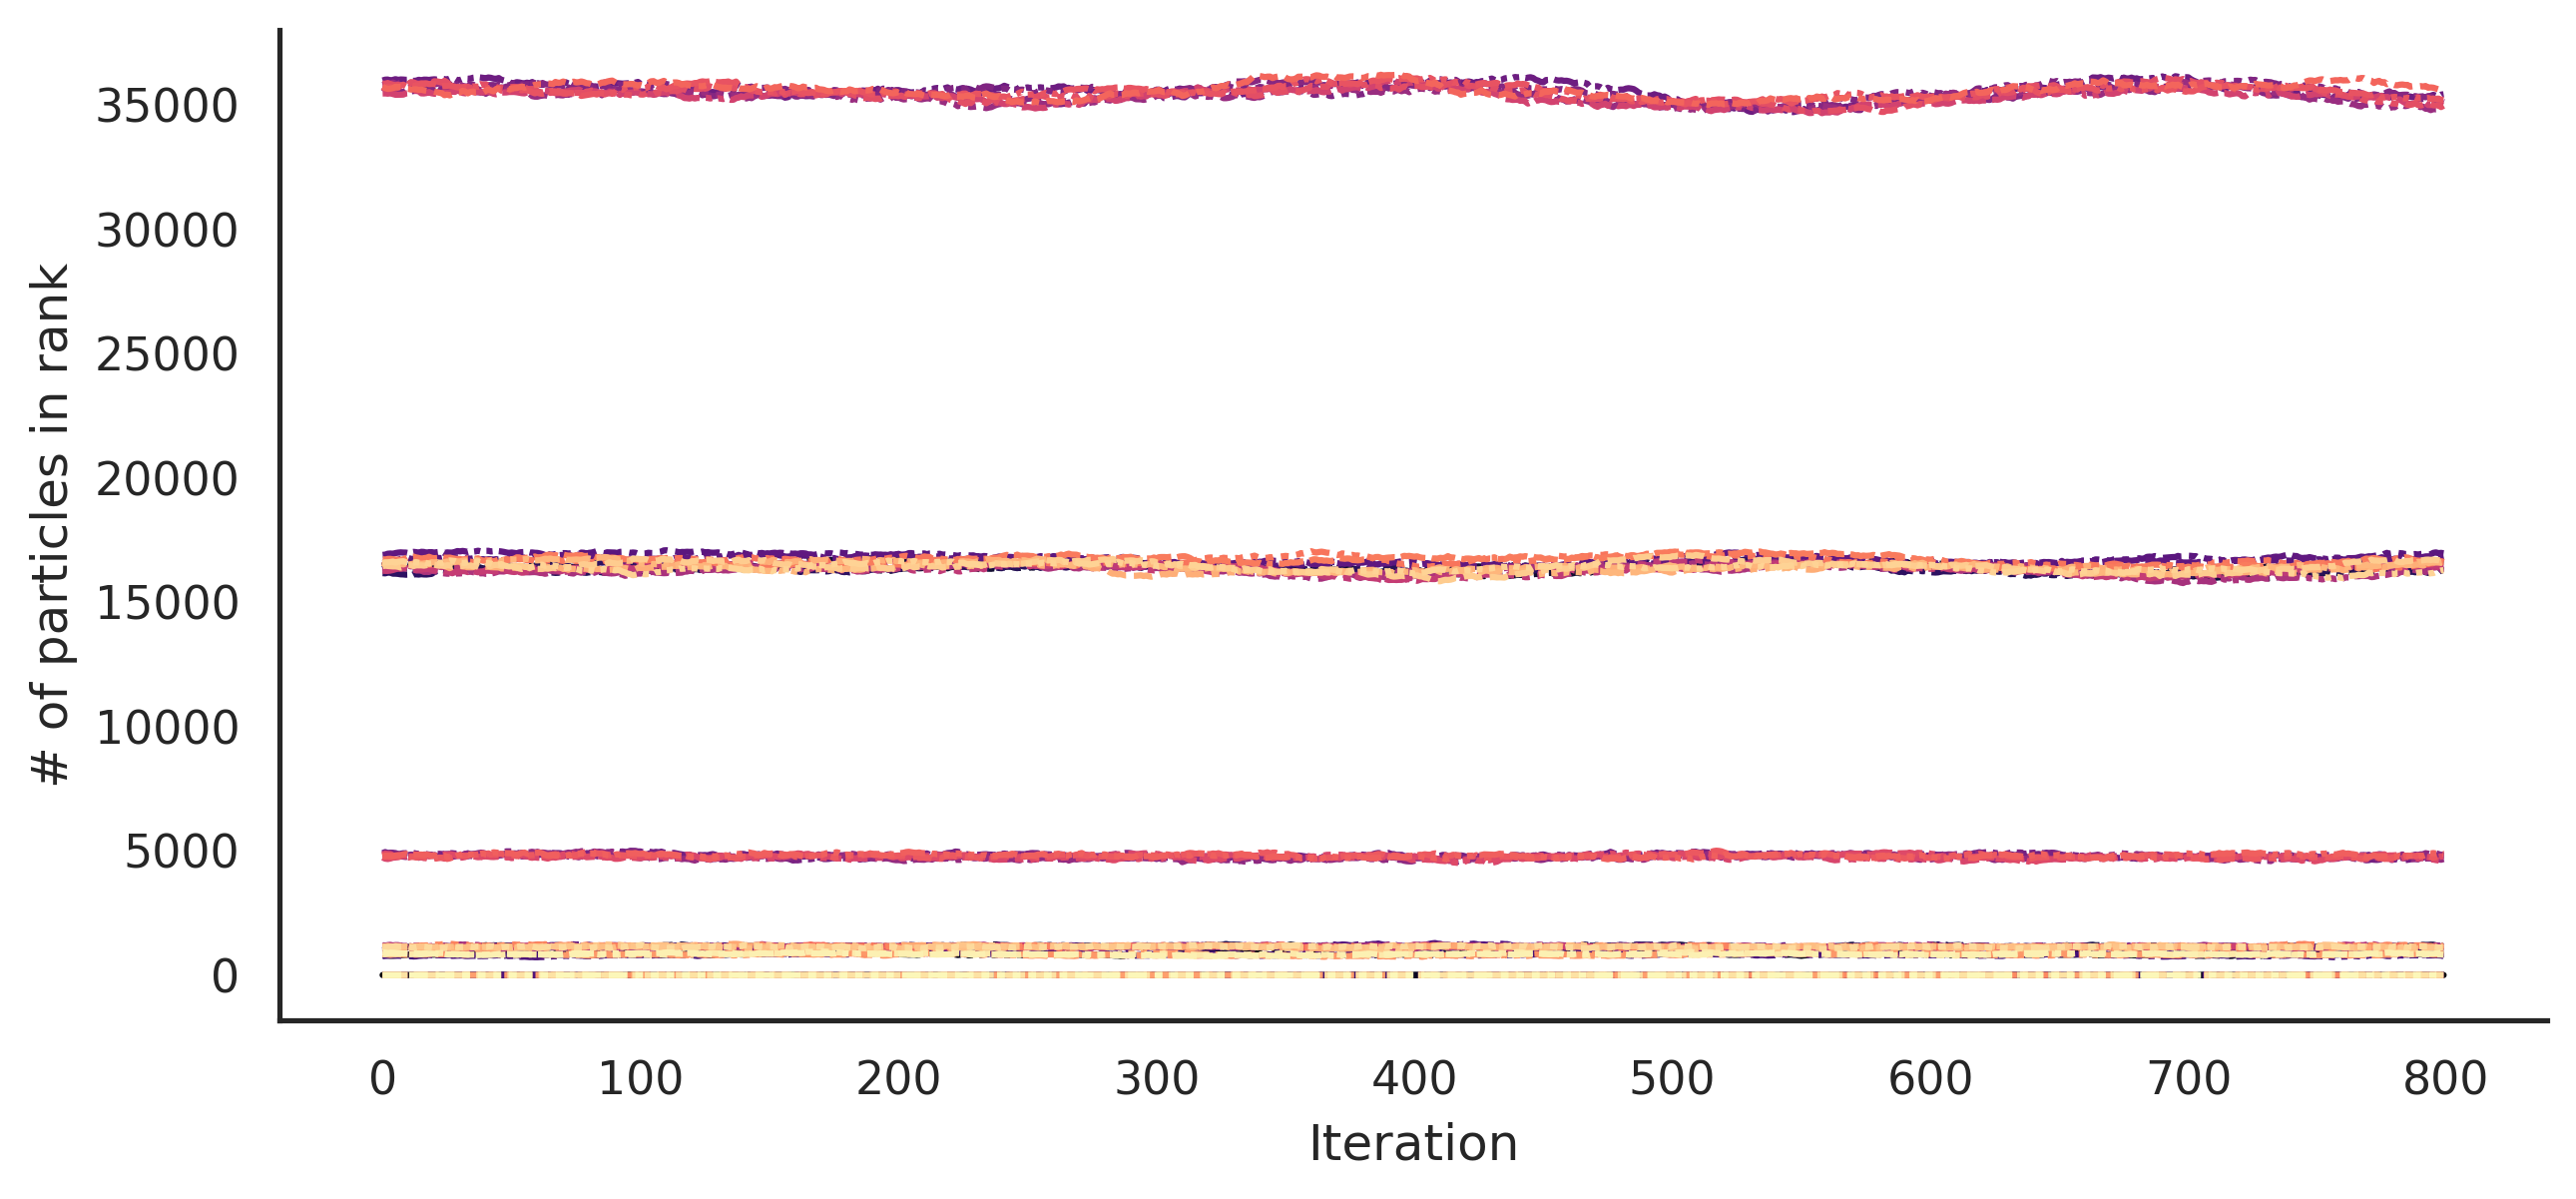

In [75]:
data = np.transpose(rank_load)
sns.set_style("white")
sns.relplot(kind="line", data=data,palette="magma",legend=False);
plt.xlabel("Iteration")
plt.ylabel("# of particles in rank")
# plt.yscale('log')
plt.gcf().set_size_inches(10, 4)
plt.gcf().set_dpi(300)
sns.set()
